In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data_DeepFakes = pd.read_csv('pyagender_DeepFakes.csv', index_col=0)

In [6]:
print(data_DeepFakes.head())

                                                filename       gender  \
index                                                                   
0      /content/drive/My Drive/FakeImageDetector/data...  0.032668225   
1      /content/drive/My Drive/FakeImageDetector/data...            -   
2      /content/drive/My Drive/FakeImageDetector/data...     0.917696   
3      /content/drive/My Drive/FakeImageDetector/data...  0.036866818   
4      /content/drive/My Drive/FakeImageDetector/data...    0.8750631   

                      age  
index                      
0      32.283002284852046  
1                       -  
2      31.841469694639272  
3       35.49534453271053  
4      30.228436802563692  


In [9]:
data_DeepFakes = data_DeepFakes.replace('-', np.nan)
print(data_DeepFakes.head())

                                                filename       gender  \
index                                                                   
0      /content/drive/My Drive/FakeImageDetector/data...  0.032668225   
1      /content/drive/My Drive/FakeImageDetector/data...          NaN   
2      /content/drive/My Drive/FakeImageDetector/data...     0.917696   
3      /content/drive/My Drive/FakeImageDetector/data...  0.036866818   
4      /content/drive/My Drive/FakeImageDetector/data...    0.8750631   

                      age  
index                      
0      32.283002284852046  
1                     NaN  
2      31.841469694639272  
3       35.49534453271053  
4      30.228436802563692  


In [14]:
data_DeepFakes.isnull().sum()

filename            0
gender            151
age               151
fake_real_name      0
dtype: int64

In [15]:
data_DeepFakes = data_DeepFakes.dropna()

In [16]:
data_DeepFakes.isnull().sum()

filename          0
gender            0
age               0
fake_real_name    0
dtype: int64

In [19]:
data_DeepFakes['gender'] = data_DeepFakes['gender'].astype(float)

In [20]:
data_DeepFakes['age'] = data_DeepFakes['age'].astype(float)

In [21]:
data_all = data_DeepFakes
data_all['fake_real_name'] = data_all['filename'].apply(lambda x: x.split('/'))
data_all['fake_real_name'] = data_all['fake_real_name'].apply(lambda x: x[-4])

In [22]:
data_all['age_cat'] = pd.cut(data_all['age'], bins = [0., 20., 30., 40., 50., np.inf], labels = 
                                ['age_less_20', 'age_20_30', 'age_30_40', 'age_40_50', 'age_above_50'])

In [23]:
data_all['gender10'] = data_all['gender'].apply(lambda x: 1 if x > 0.5 else 0)

In [24]:
data_all['gender_age_cat'] = data_all['gender10'].astype(str) + "_" + data_all['age_cat'].astype(str)

In [25]:
data_all['imgname'] = data_all['filename'].apply(lambda x: x.split('/')[-1])

In [26]:
def get_target_source(img):
    if (img[2] == "_") and (img[3] == "_"):
        return img[:2]
    if (img[2] != "_") and (img[3] == "_"):
        return img[:7]
    if (img[2] == "_") and (img[3] != "_"):
        return img[:5]
    if (img[4:7] =='mp4'):
        return img[:3]

In [27]:
data_all['target_source'] = data_all['imgname'].apply(lambda x: get_target_source(x))

In [28]:
print(data_all.head())

                                                filename    gender        age  \
index                                                                           
0      /content/drive/My Drive/FakeImageDetector/data...  0.032668  32.283002   
2      /content/drive/My Drive/FakeImageDetector/data...  0.917696  31.841470   
3      /content/drive/My Drive/FakeImageDetector/data...  0.036867  35.495345   
4      /content/drive/My Drive/FakeImageDetector/data...  0.875063  30.228437   
5      /content/drive/My Drive/FakeImageDetector/data...  0.935679  40.027410   

      fake_real_name    age_cat  gender10 gender_age_cat             imgname  \
index                                                                          
0          Deepfakes  age_30_40         0    0_age_30_40   484_415.mp4_6.jpg   
2          Deepfakes  age_30_40         1    1_age_30_40  391_406.mp4_11.jpg   
3          Deepfakes  age_30_40         0    0_age_30_40   153_150.mp4_7.jpg   
4          Deepfakes  age_30_40 

In [31]:
print(data_all.shape)

(8248, 9)


In [32]:
data_deepfakes = data_all

In [33]:
data = pd.read_csv('dataset_new.csv', index_col=0)

In [34]:
print(data.shape)

(47561, 11)


In [35]:
print(data_deepfakes.head())

                                                filename    gender        age  \
index                                                                           
0      /content/drive/My Drive/FakeImageDetector/data...  0.032668  32.283002   
2      /content/drive/My Drive/FakeImageDetector/data...  0.917696  31.841470   
3      /content/drive/My Drive/FakeImageDetector/data...  0.036867  35.495345   
4      /content/drive/My Drive/FakeImageDetector/data...  0.875063  30.228437   
5      /content/drive/My Drive/FakeImageDetector/data...  0.935679  40.027410   

      fake_real_name    age_cat  gender10 gender_age_cat             imgname  \
index                                                                          
0          Deepfakes  age_30_40         0    0_age_30_40   484_415.mp4_6.jpg   
2          Deepfakes  age_30_40         1    1_age_30_40  391_406.mp4_11.jpg   
3          Deepfakes  age_30_40         0    0_age_30_40   153_150.mp4_7.jpg   
4          Deepfakes  age_30_40 

In [36]:
print(data.head())

                                                filename    gender        age  \
index                                                                           
0      /content/drive/My Drive/FakeImageDetector/real...  0.061687  32.637210   
1      /content/drive/My Drive/FakeImageDetector/real...  0.063749  31.867521   
2      /content/drive/My Drive/FakeImageDetector/real...  0.032942  34.179979   
3      /content/drive/My Drive/FakeImageDetector/real...  0.026315  33.717182   
4      /content/drive/My Drive/FakeImageDetector/real...  0.055017  37.760803   

      method  label fake_real_name    age_cat  gender10 gender_age_cat  \
index                                                                    
0       Real      1    real_images  age_30_40         0    0_age_30_40   
1       Real      1    real_images  age_30_40         0    0_age_30_40   
2       Real      1    real_images  age_30_40         0    0_age_30_40   
3       Real      1    real_images  age_30_40         0    0_a

In [37]:
data = data.append(data_deepfakes)

/Users/ruska/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [38]:
print(data.shape)

(55809, 11)


In [39]:
print(data.head())

             age    age_cat fake_real_name  \
index                                        
0      32.637210  age_30_40    real_images   
1      31.867521  age_30_40    real_images   
2      34.179979  age_30_40    real_images   
3      33.717182  age_30_40    real_images   
4      37.760803  age_30_40    real_images   

                                                filename    gender  gender10  \
index                                                                          
0      /content/drive/My Drive/FakeImageDetector/real...  0.061687         0   
1      /content/drive/My Drive/FakeImageDetector/real...  0.063749         0   
2      /content/drive/My Drive/FakeImageDetector/real...  0.032942         0   
3      /content/drive/My Drive/FakeImageDetector/real...  0.026315         0   
4      /content/drive/My Drive/FakeImageDetector/real...  0.055017         0   

      gender_age_cat                                            imgname  \
index                                    

In [40]:
data = data.reset_index()
print(data.loc[0])

index                                                             0
age                                                         32.6372
age_cat                                                   age_30_40
fake_real_name                                          real_images
filename          /content/drive/My Drive/FakeImageDetector/real...
gender                                                    0.0616868
gender10                                                          0
gender_age_cat                                          0_age_30_40
imgname           21__outside_talking_still_laughing.mp4_image6.jpg
label                                                             1
method                                                         Real
target_source                                                    21
Name: 0, dtype: object


In [41]:
data1 = data.loc[:,['filename', 'imgname', 'fake_real_name', 'target_source', 'age', 'age_cat', 'gender', 'gender10',
                  'gender_age_cat']]

In [42]:
print(data1.head())

                                            filename  \
0  /content/drive/My Drive/FakeImageDetector/real...   
1  /content/drive/My Drive/FakeImageDetector/real...   
2  /content/drive/My Drive/FakeImageDetector/real...   
3  /content/drive/My Drive/FakeImageDetector/real...   
4  /content/drive/My Drive/FakeImageDetector/real...   

                                             imgname fake_real_name  \
0  21__outside_talking_still_laughing.mp4_image6.jpg    real_images   
1  21__outside_talking_still_laughing.mp4_image7.jpg    real_images   
2  21__outside_talking_still_laughing.mp4_image8.jpg    real_images   
3  21__outside_talking_still_laughing.mp4_image9.jpg    real_images   
4  21__outside_talking_still_laughing.mp4_image10...    real_images   

  target_source        age    age_cat    gender  gender10 gender_age_cat  
0            21  32.637210  age_30_40  0.061687         0    0_age_30_40  
1            21  31.867521  age_30_40  0.063749         0    0_age_30_40  
2          

In [43]:
print(data1.shape)

(55809, 9)


In [44]:
data1.to_csv("dataset2104.csv", index=0)

In [ ]:
img[4:7] =='mp4'

In [45]:
data = data1

In [ ]:
data1['fake_real_name'] = data1['imgname'].apply[]

In [46]:
d2 = data1.loc[:, ['fake_real_name', 'imgname']]

In [47]:
def f(x):
    if x[1][4:7] == 'mp4':
        return 'real_images_youtube'
    else:
        return x[0]

In [48]:
d2['frn'] = d2.apply(f, axis = 1)
print(d2['frn'])

0        real_images
1        real_images
2        real_images
3        real_images
4        real_images
5        real_images
6        real_images
7        real_images
8        real_images
9        real_images
10       real_images
11       real_images
12       real_images
13       real_images
14       real_images
15       real_images
16       real_images
17       real_images
18       real_images
19       real_images
20       real_images
21       real_images
22       real_images
23       real_images
24       real_images
25       real_images
26       real_images
27       real_images
28       real_images
29       real_images
            ...     
55779      Deepfakes
55780      Deepfakes
55781      Deepfakes
55782      Deepfakes
55783      Deepfakes
55784      Deepfakes
55785      Deepfakes
55786      Deepfakes
55787      Deepfakes
55788      Deepfakes
55789      Deepfakes
55790      Deepfakes
55791      Deepfakes
55792      Deepfakes
55793      Deepfakes
55794      Deepfakes
55795      De

In [49]:
print(d2[d2['frn'] == 'real_images_youtube'])

      fake_real_name              imgname                  frn
3783     real_images   007.mp4_image7.jpg  real_images_youtube
3784     real_images   007.mp4_image8.jpg  real_images_youtube
3785     real_images   007.mp4_image9.jpg  real_images_youtube
3786     real_images  007.mp4_image10.jpg  real_images_youtube
3787     real_images   039.mp4_image1.jpg  real_images_youtube
3788     real_images   039.mp4_image2.jpg  real_images_youtube
3789     real_images   039.mp4_image3.jpg  real_images_youtube
3790     real_images   039.mp4_image4.jpg  real_images_youtube
3791     real_images   039.mp4_image5.jpg  real_images_youtube
3792     real_images   039.mp4_image6.jpg  real_images_youtube
3793     real_images   039.mp4_image7.jpg  real_images_youtube
3794     real_images   039.mp4_image8.jpg  real_images_youtube
3795     real_images   039.mp4_image9.jpg  real_images_youtube
3796     real_images  039.mp4_image10.jpg  real_images_youtube
3797     real_images  039.mp4_image11.jpg  real_images_

In [50]:
data1['fake_real_name'] = d2['frn']

In [51]:
print(data1[data1['fake_real_name'] == 'real_images_youtube'])

                                                filename              imgname  \
3783   /content/drive/My Drive/FakeImageDetector/real...   007.mp4_image7.jpg   
3784   /content/drive/My Drive/FakeImageDetector/real...   007.mp4_image8.jpg   
3785   /content/drive/My Drive/FakeImageDetector/real...   007.mp4_image9.jpg   
3786   /content/drive/My Drive/FakeImageDetector/real...  007.mp4_image10.jpg   
3787   /content/drive/My Drive/FakeImageDetector/real...   039.mp4_image1.jpg   
3788   /content/drive/My Drive/FakeImageDetector/real...   039.mp4_image2.jpg   
3789   /content/drive/My Drive/FakeImageDetector/real...   039.mp4_image3.jpg   
3790   /content/drive/My Drive/FakeImageDetector/real...   039.mp4_image4.jpg   
3791   /content/drive/My Drive/FakeImageDetector/real...   039.mp4_image5.jpg   
3792   /content/drive/My Drive/FakeImageDetector/real...   039.mp4_image6.jpg   
3793   /content/drive/My Drive/FakeImageDetector/real...   039.mp4_image7.jpg   
3794   /content/drive/My Dri

In [52]:
data1.to_csv("dataset2104.csv", index=0)

In [ ]:
tvt_split_f2f.pickle
tvt_split_f2f_youtube.pickle
tvt_split_dfd.pickle
tvt_split_dfd_actor.pickle

In [97]:
import pickle

with open('tvt_split_f2f.pickle', 'rb') as handle:
    fakes4 = pickle.load(handle)

with open('tvt_split_f2f_youtube.pickle', 'rb') as handle:
    youtube = pickle.load(handle)

with open('tvt_split_dfd.pickle', 'rb') as handle:
    fakes_dfd = pickle.load(handle)
    
with open('tvt_split_dfd_actor.pickle', 'rb') as handle:
    actors = pickle.load(handle)

In [98]:
print(data1['fake_real_name'].unique())

['real_images' 'real_images_youtube' 'NeuralTextures' 'FaceSwap'
 'DeepFakeDetection' 'Face2Face' 'Deepfakes']


In [99]:
def f(x):
    if x[1][4:7] == 'mp4':
        return 'real_images_youtube'
    else:
        return x[0]

In [100]:
def get_train_val_test(tvt_dict, imgname):
    if imgname in tvt_dict['train']:
        return 'train'
    if imgname in tvt_dict['validation']:
        return 'validation'
    if imgname in tvt_dict['test']:
        return 'test'
    else:
        return np.nan

In [101]:
def train_test_val_by_foldername(df):
    if df[0] == 'real_images_youtube':
        return get_train_val_test(youtube, df[1][:3])
    if df[0] == 'real_images':
        return get_train_val_test(actors, df[1][:2])
    if df[0] == 'DeepFakeDetection':
        return get_train_val_test(fakes_dfd, df[1][:5])
    else:
        return get_train_val_test(fakes4, df[1][:7])

In [102]:
data_train = data1.loc[:, ['fake_real_name', 'imgname']]

In [103]:
data_train['train_test_validation'] = data_train.apply(train_test_val_by_foldername, axis=1)

In [104]:
print(data_train['train_test_validation'])

0             train
1             train
2             train
3             train
4             train
5             train
6             train
7             train
8             train
9             train
10            train
11            train
12            train
13            train
14            train
15            train
16            train
17            train
18            train
19            train
20            train
21            train
22            train
23            train
24            train
25            train
26            train
27            train
28            train
29            train
            ...    
55779          test
55780         train
55781         train
55782         train
55783         train
55784         train
55785         train
55786          test
55787         train
55788         train
55789          test
55790          test
55791         train
55792         train
55793    validation
55794         train
55795    validation
55796          test
55797         train


In [105]:
print(data_train[data_train['train_test_validation'].isnull() == True])

          fake_real_name                                            imgname  \
20277           FaceSwap                          Copy of 000_003.mp4_6.jpg   
21024           FaceSwap                          Copy of 000_003.mp4_2.jpg   
21650           FaceSwap                          Copy of 000_003.mp4_1.jpg   
23159           FaceSwap                          Copy of 000_003.mp4_3.jpg   
24352           FaceSwap                          Copy of 000_003.mp4_5.jpg   
24467           FaceSwap                          Copy of 000_003.mp4_7.jpg   
26125           FaceSwap                          Copy of 000_003.mp4_4.jpg   
26312  DeepFakeDetection        14_03__talking_angry_couch__L0GHYIFS_36.bmp   
26313  DeepFakeDetection        14_03__talking_angry_couch__L0GHYIFS_38.bmp   
26314  DeepFakeDetection        14_03__talking_angry_couch__L0GHYIFS_40.bmp   
26315  DeepFakeDetection        14_03__talking_angry_couch__L0GHYIFS_42.bmp   
26316  DeepFakeDetection        14_03__talking_angry

In [106]:
data_nottrain = data_train[data_train['train_test_validation'].isnull() == True]

In [107]:
print(data_nottrain['fake_real_name'].unique())

['FaceSwap' 'DeepFakeDetection']


In [108]:
data1['train'] = data_train['train_test_validation']

In [109]:
print(data1.head())

                                            filename  \
0  /content/drive/My Drive/FakeImageDetector/real...   
1  /content/drive/My Drive/FakeImageDetector/real...   
2  /content/drive/My Drive/FakeImageDetector/real...   
3  /content/drive/My Drive/FakeImageDetector/real...   
4  /content/drive/My Drive/FakeImageDetector/real...   

                                             imgname fake_real_name  \
0  21__outside_talking_still_laughing.mp4_image6.jpg    real_images   
1  21__outside_talking_still_laughing.mp4_image7.jpg    real_images   
2  21__outside_talking_still_laughing.mp4_image8.jpg    real_images   
3  21__outside_talking_still_laughing.mp4_image9.jpg    real_images   
4  21__outside_talking_still_laughing.mp4_image10...    real_images   

  target_source        age    age_cat    gender  gender10 gender_age_cat  \
0            21  32.637210  age_30_40  0.061687         0    0_age_30_40   
1            21  31.867521  age_30_40  0.063749         0    0_age_30_40   
2       

In [110]:
data1.isnull().sum()

filename             0
imgname              0
fake_real_name       0
target_source        7
age                  0
age_cat              0
gender               0
gender10             0
gender_age_cat       0
train             2935
dtype: int64

In [111]:
data1_nan = data1[data1['train'].isnull() == True]

In [80]:
actor_nan = data1_nan[data1_nan['fake_real_name'] == 'real_images']['target_source'].unique()

In [81]:
print(actor_nan.tolist())

['16', '28', '23', '18', '17', '22']


In [112]:
dfd_nan = data1_nan[data1_nan['fake_real_name'] == 'DeepFakeDetection']['target_source'].unique()
print(dfd_nan.tolist())

['14_03', '03_07', '02_09', '02_15', '28_16', '03_15', '18_15', '18_09', '13_02', '02_13', '23_22', '03_13', '17_16', '11_01', '28_05', '09_03', '14_13', '14_02', '18_14', '11_13', '13_03', '15_03', '22_23', '11_07', '15_02', '16_05', '09_13', '03_14', '18_11', '14_18', '03_02', '13_14', '03_11', '03_18', '02_18', '03_20', '03_09', '18_03', '15_20', '15_18', '09_02', '16_17', '11_03', '23_10', '22_19', '15_21', '14_15', '11_18', '18_02', '16_28', '13_04', '13_09', '09_14', '15_14', '02_03', '14_09', '13_11', '09_18', '02_14', '18_12']


In [83]:
print(fakes_dfd)

{'train': ['27_02', '01_15', '25_09', '25_15', '21_07', '07_13', '21_14', '01_04', '26_14', '04_26', '01_02', '07_21', '24_23', '04_21', '01_09', '20_26', '06_25', '26_04', '07_09', '26_11', '04_18', '21_02', '05_08', '25_27', '20_06', '07_02', '06_02', '06_18', '06_26', '26_07', '26_06', '26_13', '10_19', '20_12', '27_18', '06_20', '04_06', '21_11', '25_02', '21_25', '27_13', '25_12', '12_15', '20_09', '06_07', '12_20', '08_05', '07_14', '12_13', '26_18', '24_19', '26_27', '26_12', '05_17', '26_25', '24_22', '06_14', '25_06', '04_01', '25_20', '06_03', '08_17', '12_02', '07_04', '21_01', '21_03', '19_23', '01_27', '19_10', '26_20', '20_13', '12_14', '26_03', '09_11', '04_27', '27_14', '14_01', '21_06', '03_04', '02_11', '26_15', '15_27', '07_25', '15_04', '20_27', '21_09', '10_24', '20_21', '05_28', '20_25', '06_12'], 'validation': ['27_26', '01_03', '06_04', '08_16', '21_04', '27_03', '12_26', '27_01', '07_12', '08_28', '20_14', '26_09', '12_25', '06_15', '07_15', '10_22', '06_11', '

In [84]:
print(fakes_dfd['test'])

['07_26', '01_26', '25_21', '20_03', '12_06', '01_11', '05_16', '20_07', '21_15', '07_06', '12_18', '04_07', '10_23', '01_21', '19_24', '12_07', '20_15', '04_13', '07_03', '19_22', '01_20', '20_01', '25_26', '15_13', '02_04', '13_25', '21_18', '11_04', '06_12']


In [85]:
fs_nan = data1_nan[data1_nan['fake_real_name'] == 'FaceSwap']['target_source'].unique()
print(fs_nan.tolist())

[nan]


In [86]:
print(data1_nan['fake_real_name'].unique())

['real_images' 'FaceSwap' 'DeepFakeDetection']


In [87]:
print(data1_nan[data1_nan['fake_real_name'] == 'FaceSwap'])

                                                filename  \
20277  /content/drive/My Drive/FakeImageDetector/data...   
21024  /content/drive/My Drive/FakeImageDetector/data...   
21650  /content/drive/My Drive/FakeImageDetector/data...   
23159  /content/drive/My Drive/FakeImageDetector/data...   
24352  /content/drive/My Drive/FakeImageDetector/data...   
24467  /content/drive/My Drive/FakeImageDetector/data...   
26125  /content/drive/My Drive/FakeImageDetector/data...   

                         imgname fake_real_name target_source        age  \
20277  Copy of 000_003.mp4_6.jpg       FaceSwap           NaN  44.286446   
21024  Copy of 000_003.mp4_2.jpg       FaceSwap           NaN  45.291066   
21650  Copy of 000_003.mp4_1.jpg       FaceSwap           NaN  43.193126   
23159  Copy of 000_003.mp4_3.jpg       FaceSwap           NaN  38.333096   
24352  Copy of 000_003.mp4_5.jpg       FaceSwap           NaN  33.359346   
24467  Copy of 000_003.mp4_7.jpg       FaceSwap           NaN  

In [113]:
import pickle

with open('tvt_split_f2f.pickle', 'rb') as handle:
    fakes4 = pickle.load(handle)

with open('tvt_split_f2f_youtube.pickle', 'rb') as handle:
    youtube = pickle.load(handle)

with open('tvt_split_dfd2.pickle', 'rb') as handle:
    fakes_dfd = pickle.load(handle)
    
with open('tvt_split_dfd_actor2.pickle', 'rb') as handle:
    actors = pickle.load(handle)

In [114]:
data_train = data1.loc[:, ['fake_real_name', 'imgname']]

In [115]:
data_train['train_test_validation'] = data_train.apply(train_test_val_by_foldername, axis=1)

In [116]:
data_nottrain = data_train[data_train['train_test_validation'].isnull() == True]

In [117]:
data1['train'] = data_train['train_test_validation']

In [118]:
data1.isnull().sum()

filename          0
imgname           0
fake_real_name    0
target_source     7
age               0
age_cat           0
gender            0
gender10          0
gender_age_cat    0
train             7
dtype: int64

In [120]:
data1 = data1.dropna()

In [121]:
data1.to_csv("dataset2204.csv")

In [123]:
train_all = data1[data1['train'] =='train']
print(train_all.shape)

(37299, 10)


In [125]:
val_all = data1[data1['train'] == 'validation']
print(val_all.shape)

(8545, 10)


In [127]:
test_all = data1[data1['train'] == 'test']
print(test_all.shape)

(9958, 10)


<BarContainer object of 4 artists>

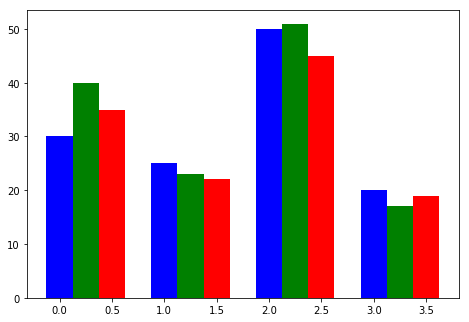

In [128]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [136]:
train_gender = train_all['gender10'].value_counts()/train_all.shape[0]
tr_g = train_gender.values
test_gender = test_all['gender10'].value_counts()/test_all.shape[0]
te_g = test_gender.values
val_gender = val_all['gender10'].value_counts()/val_all.shape[0]
val_g = val_gender.values

In [133]:
print(train_gender.values)

[0.53526904 0.46473096]


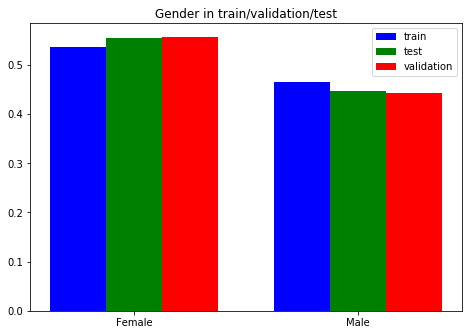

In [167]:
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, tr_g, color = 'b', width = 0.25, label = 'train')
ax.bar(X + 0.25, te_g, color = 'g', width = 0.25, label = 'test')
ax.bar(X + 0.50, val_g, color = 'r', width = 0.25, label = 'validation')
ax.set_xticks([0.25, 1.25])
ax.set_xticklabels( ('Female', 'Male') )
ax.legend()
ax.set_title("Gender in train/validation/test")
plt.show()

/Users/ruska/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


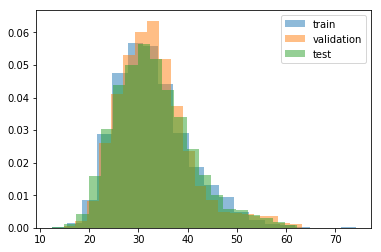

In [161]:
plt.hist(train_all['age'], alpha=0.5, bins = 20, label='train', normed=True)
plt.hist(val_all['age'], alpha=0.5, bins = 20, label='validation', normed = True)
plt.hist(test_all['age'], alpha=0.5, bins = 20, label='test', normed = True)
plt.legend(loc='upper right')
plt.show()

/Users/ruska/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


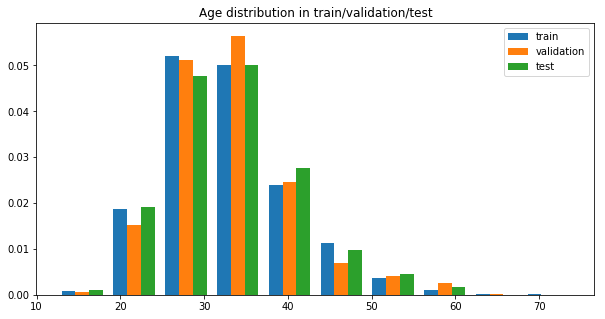

In [168]:

plt.figure(figsize=(10,5))
plt.hist([train_all['age'].values, val_all['age'].values, test_all['age'].values], bins=10, label=['train', 'validation', 'test'], normed = True)
plt.legend(loc='upper right')
plt.title('Age distribution in train/validation/test')
plt.show()

In [169]:
data_real1 = data1[data1['fake_real_name'] == 'real_images']
data_real2 = data1[data1['fake_real_name'] == 'real_images_youtube']

In [170]:
print((data_real1.shape[0] + data_real2.shape[0])/data1.shape[0])


0.22816386509444106
